# Initialize

In [1]:
import matplotlib, matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from scipy.stats import norm
from scipy.io import loadmat
import glob
import pandas as pd
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Seed Random number generator for repeatability
np.random.seed(19690720)

plt.style.use('default')
#matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams.update({'font.size': 18})

# Data Sets
## Campaign Storage


In [2]:
cs_data="""
# /gpfs/csfs1 (as of 2/22):
# Size      # Files   (pct)           Total Size   (pct)
# ------- --------- ------- -------------------- -------
    0B:  10222000   1.44%                  0 b   0.00%
 <512B:  24026969   3.38%              3.57 GB   0.00%
  <4KB:  52093490   7.34%             90.63 GB   0.00%
 <16KB:  45274862   6.38%            384.08 GB   0.00%
 <32KB:  31315939   4.41%            766.70 GB   0.00%
 <64KB:  29484172   4.15%              1.35 TB   0.00%
<128KB:  51371838   7.23%              4.75 TB   0.01%
  <1MB: 165591791  23.32%             58.04 TB   0.11%
  <8MB: 144536898  20.35%            545.42 TB   1.03%
<100MB: 111508393  15.70%            3.3695 PB   6.51%
  <1GB:  34845065   4.91%            9.9620 PB  19.24%
 <10GB:   9214509   1.30%           22.2695 PB  43.00%
<100GB:    557998   0.08%           11.7039 PB  22.60%
  <1TB:     15914   0.00%            3.0150 PB   5.82%
  1TB+:       497   0.00%            942.18 TB   1.78%

# Total size: 887801777 - 51.7884 PB (51.8249 PB allocated)
# Files: 710181149 - 51.8312 PB (51.8289 PB allocated)
# Dirs: 16062729 - 153.64 GB (202.48 GB allocated)
# Links: 161557899 - 18.59 GB (0 b allocated)
"""

scratch_data="""
# /gpfs/fs1/scratch (as of 2/22):
# Size      # Files   (pct)           Total Size   (pct)
# ------- --------- ------- -------------------- -------
    0B:   4855920   0.66%                  0 b   0.00%
 <512B:  29244921   3.99%              4.94 GB   0.00%
  <4KB:  38057572   5.19%             75.56 GB   0.00%
 <16KB:  41583095   5.67%            366.06 GB   0.00%
 <32KB: 257902933  35.18%              5.76 TB   0.05%
 <64KB:  73086453   9.97%              2.74 TB   0.02%
<128KB:  42259378   5.76%              3.55 TB   0.03%
  <1MB: 112286098  15.32%             37.81 TB   0.34%
  <8MB:  84843436  11.57%            214.89 TB   1.91%
<100MB:  37393623   5.10%            1.1971 PB  10.92%
  <1GB:   9455706   1.29%            2.6214 PB  23.92%
 <10GB:   1708486   0.23%            4.0518 PB  36.97%
<100GB:     82677   0.01%            1.8214 PB  16.62%
  <1TB:      4102   0.00%            905.54 TB   8.07%
  1TB+:        77   0.00%            141.55 TB   1.26%

# Total size: 822628744 - 10.9606 PB (10.8906 PB allocated)
# Files: 733055111 - 10.9691 PB (10.8903 PB allocated)
# Dirs: 20652394 - 227.17 GB (316.31 GB allocated)
# Links: 68921239 - 5.83 GB (0 b allocated)
"""

archive_data="""
# /gpfs/gpfs0/archive (Quasar, as of 2/22):
# Size      # Files   (pct)           Total Size   (pct)
# ------- --------- ------- -------------------- -------
    0B:         7   0.00%                  0 b   0.00%
 <512B:         4   0.00%                260 b   0.00%
  <4KB:         2   0.00%              4.73 KB   0.00%
 <16KB:        35   0.00%            347.78 KB   0.00%
 <32KB:        10   0.00%            240.10 KB   0.00%
 <64KB:         1   0.00%             40.00 KB   0.00%
<128KB:         0   0.00%                  0 b   0.00%
  <1MB:        17   0.00%              5.37 MB   0.00%
  <8MB:        93   0.01%            506.94 MB   0.00%
<100MB:       469   0.03%             10.27 GB   0.00%
  <1GB:     29433   2.03%             14.67 TB   0.23%
 <10GB:   1391623  96.05%            4.6540 PB  75.93%
<100GB:     22541   1.56%            504.78 TB   8.04%
  <1TB:      4482   0.31%            803.28 TB  12.80%
  1TB+:       109   0.01%            187.84 TB   2.99%

# Total size: 1451453 - 6.1292 PB (1.4421 PB allocated)
# Files: 1448826 - 6.1292 PB (1.4421 PB allocated)
# Dirs: 2627 - 182.89 MB (354.03 MB allocated)
# Links:  - 0 b (0 b allocated)
"""

K2B=1024
M2B=K2B*1024
G2B=M2B*1024
T2B=G2B*1024

bins = np.array([0, 
                 512,
                 4*K2B,
                 16*K2B,
                 32*K2B,
                 64*K2B,
                 128*K2B,
                 1*M2B,
                 8*M2B,
                 100*M2B,
                 1*G2B,
                 10*G2B,
                 100*G2B,
                 1*T2B,
                 2*T2B])

# /gpfs/gpfs0/archive (Quasar, as of 2/22):
# Size      # Files   (pct)           Total Size   (pct)
# ------- --------- ------- -------------------- -------
    0B:         7   0.00%                  0 b   0.00%
 <512B:         4   0.00%                260 b   0.00%
  <4KB:         2   0.00%              4.73 KB   0.00%
 <16KB:        35   0.00%            347.78 KB   0.00%
 <32KB:        10   0.00%            240.10 KB   0.00%
 <64KB:         1   0.00%             40.00 KB   0.00%
<128KB:         0   0.00%                  0 b   0.00%
  <1MB:        17   0.00%              5.37 MB   0.00%
  <8MB:        93   0.01%            506.94 MB   0.00%
<100MB:       469   0.03%             10.27 GB   0.00%
  <1GB:     29433   2.03%             14.67 TB   0.23%
 <10GB:   1391623  96.05%            4.6540 PB  75.93%
<100GB:     22541   1.56%            504.78 TB   8.04%
  <1TB:      4482   0.31%            803.28 TB  12.80%
  1TB+:       109   0.01%            187.84 TB   2.99%
# Total size: 145

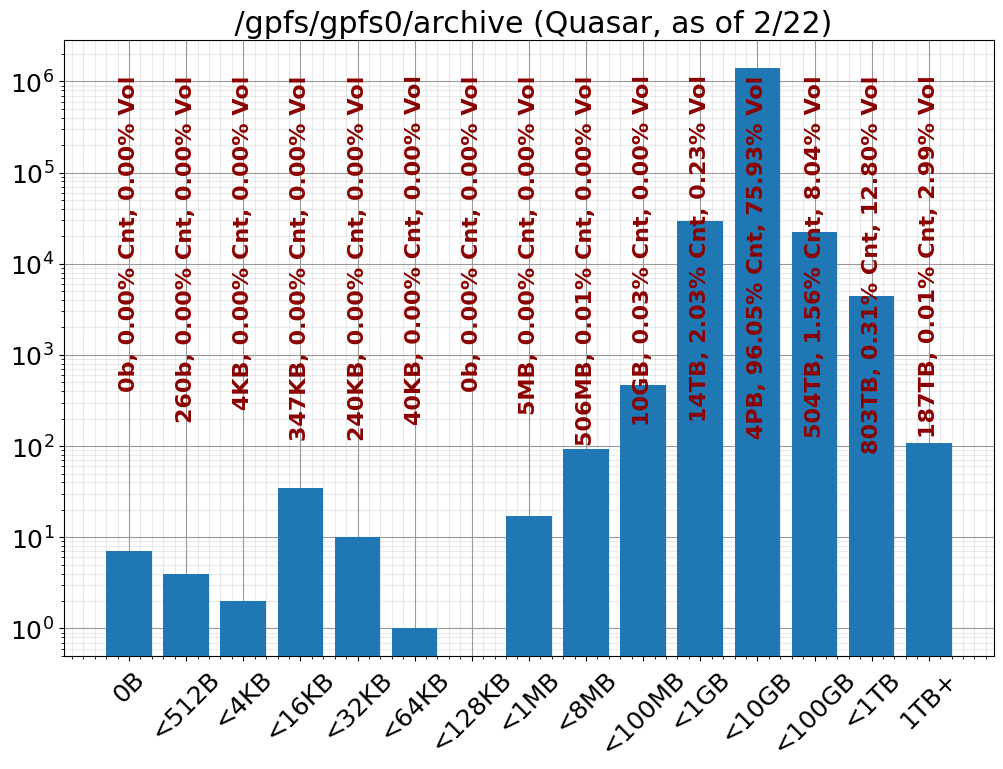

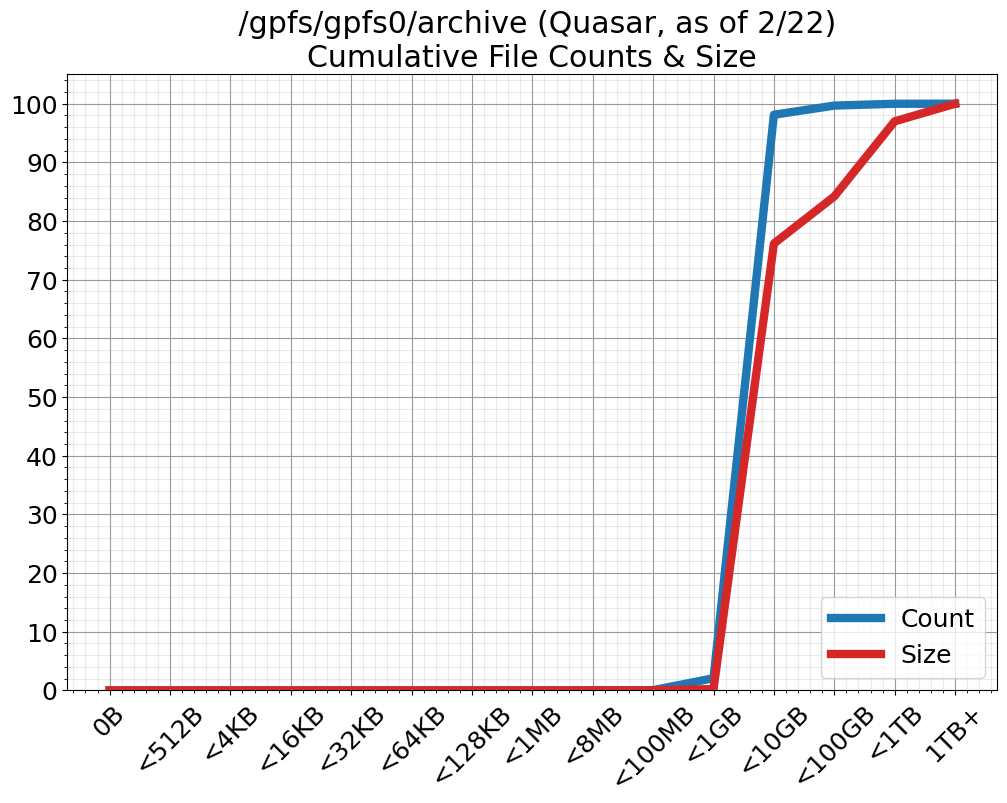

In [3]:
def format_ax(ax):
    ax.grid(visible=True, which='major', color='#999999', linestyle='-', zorder=0)
    ax.minorticks_on()
    ax.grid(visible=True, which='minor', color='#999999', linestyle='-', zorder=0, alpha=0.2)
    return

#print(cs_data)

# https://matplotlib.org/stable/gallery/color/named_colors.html
fig, ax  = plt.subplots(nrows=1, ncols=1,
                        sharex=False, sharey=False,
                        figsize=(12,8))
format_ax(ax)
fig2,ax2 = plt.subplots(nrows=1, ncols=1,
                        sharex=False, sharey=False,
                        figsize=(12,8))
format_ax(ax2)

data = archive_data
counts = list()
ilabels = list()
labels = list()
idx = 0
cum_pcount = 0.
cum_psize = 0.
cum_pcount_l = list()
cum_psize_l = list()
title = None

for line in iter(data.splitlines()):
    if not line: continue
    print(line)
    if 'gpfs' in line: title = line
    if '#' in line: continue
    barcolor = 'darkred' if 'archive' in title else 'silver' 
    line = line.replace(':','')
    
    vals = line.split()
    
    label = vals[0]
    labels.append(label)
    ilabels.append(idx)
    fcount = float(vals[1])
    
    counts.append(fcount)
    pcount = vals[2]
    psize = vals[5]
    
    # plot the 'histogram'; which is really a bar chart since we know the file counts already -
    # no need to bin the data
    fsize = str(int(float(vals[3])))+vals[4]+', '+vals[2]+' Cnt, '+psize+' Vol'
    bar = ax.bar(idx,fcount,tick_label=label,color='tab:blue',zorder=10)
    ax.annotate(fsize,
               (idx,1e6), ha='center', va='top',
                size=16, xytext=(0, 5),
                rotation=90, color=barcolor, weight='bold',
                textcoords='offset points',
                zorder=20)
    
    pcount = float(pcount.replace('%','')) 
    psize  = float(psize.replace('%',''))
    cum_pcount += pcount
    cum_psize  += psize
    cum_pcount_l.append(cum_pcount)
    cum_psize_l.append(cum_psize)
    
    #print(cum_pcount, cum_psize)
    idx += 1

ax2.plot(ilabels, cum_pcount_l, linewidth=6, label='Count', zorder=10)    
ax2.plot(ilabels, cum_psize_l,  linewidth=6, label='Size',  zorder=10, color='tab:red')  
ax2.legend(fancybox=True, loc=4)

counts = np.array(counts) #/ np.sum(counts)
#print(len(bins),len(counts))
#print(bins,counts)
ax.set_xticks(ticks=ilabels,labels=labels,rotation=45)
ax.set_yscale('log')
ax2.set_xticks(ticks=ilabels,labels=labels,rotation=45)
ax2.set_yticks(ticks=np.linspace(0,100,11))
ax2.set_ylim([0, 105])

if title:
    title = title.replace('#','')
    title = title.replace(':','')
    ax.set_title(title)
    ax2.set_title(title+'\nCumulative File Counts & Size')

#ax.set_ylim([1, None])
fig.savefig('foo.pdf', bbox_inches='tight')
fig.savefig('foo.png', bbox_inches='tight')
fig2.savefig('bar.pdf', bbox_inches='tight')
fig2.savefig('bar.png', bbox_inches='tight')

In [4]:
#for idx in range(0,len(bins)):
#    print(idx)
#    print(bins[idx],counts[idx])
#    ax.bar(idx,counts[idx],tick_label=)
#pl.gca().set_xscale('log')
#pl.gca().set_yscale('log')